In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from collections import defaultdict

import sim_lib.graph as graph
import sim_lib.graph_create as gc
import sim_lib.graph_networkx as gnx
import sim_lib.util as util

import sim_lib.attr_lib.util as attr_util
from sim_lib.attr_lib.formation import *

In [2]:
_N = 16

In [3]:
def draw_graph(G_attr, params):
    G_attr_nx = gnx.graph_to_nx(G_attr)
    G_attr_vtx_pos = nx.drawing.layout.spring_layout(G_attr_nx)
    
    prev_pos = G_attr_vtx_pos
    prev_nodes = G_attr_nx.nodes()
    
    colors = []
    if isinstance(params['attr_prob'][0], Iterable):
        colors = [ vtx.draw_params['color'] for vtx in G_attr.vertices ]
    else:
        colors = [ 'b' ] * len(G_attr.vertices)
        
    prev_pos = nx.drawing.layout.spring_layout(G_attr_nx)
    G_attr_vtx_pos = nx.drawing.layout.spring_layout(G_attr_nx,
                                                     pos=prev_pos, fixed=prev_nodes)
    
    # Draw graph
    plt.figure(figsize=(15,15))
    nx.draw_networkx(G_attr_nx, pos=G_attr_vtx_pos, node_color=colors,
                     node_size=40, width=0.6, with_labels=None)
    
def plot_centralities(G_attr, params):
    G_attr_nx = gnx.graph_to_nx(G_attr)
    ev_centrality = nx.algorithms.centrality.eigenvector_centrality(G_attr_nx)
    fig, axs = plt.subplots(figsize=(15, 15))
    
    centralities = defaultdict(lambda : [])
    if isinstance(params['attr_prob'][0], Iterable):
        for vtx in G_attr.vertices:
            centralities[vtx.draw_params['color']].append(ev_centrality[vtx])
    else:
        centralities['b'] =  [ ev_centrality[vtx] for vtx in G_attr.vertices ]
    
    for color, cntrls in centralities.items():
        axs.hist(cntrls, bins=16, alpha=0.5, color=color)
    plt.plot()

edges: 13.0


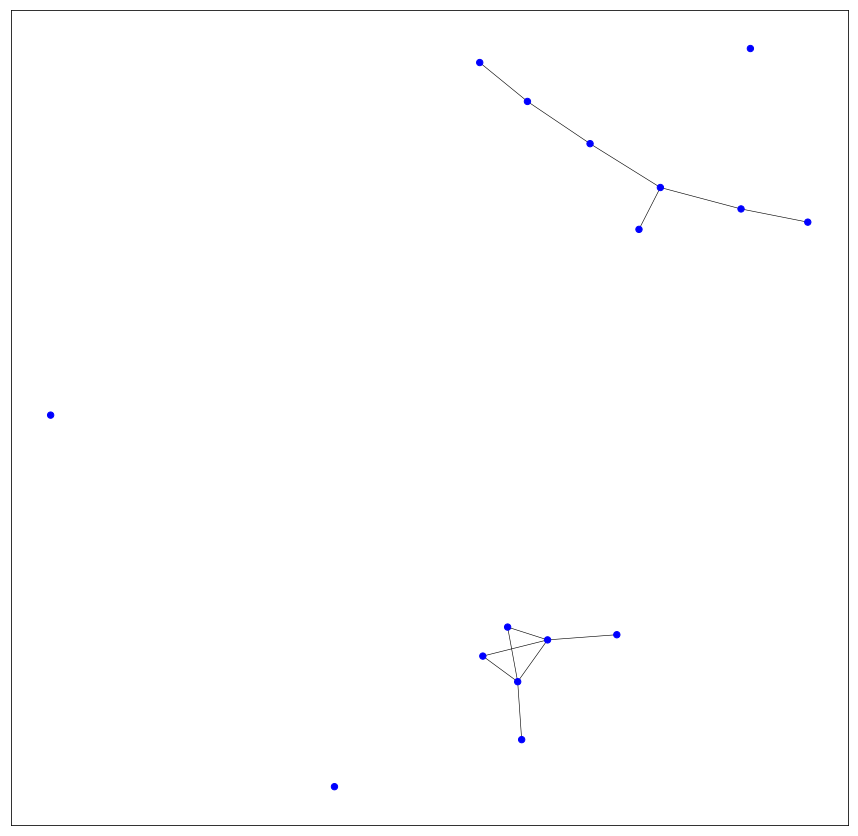

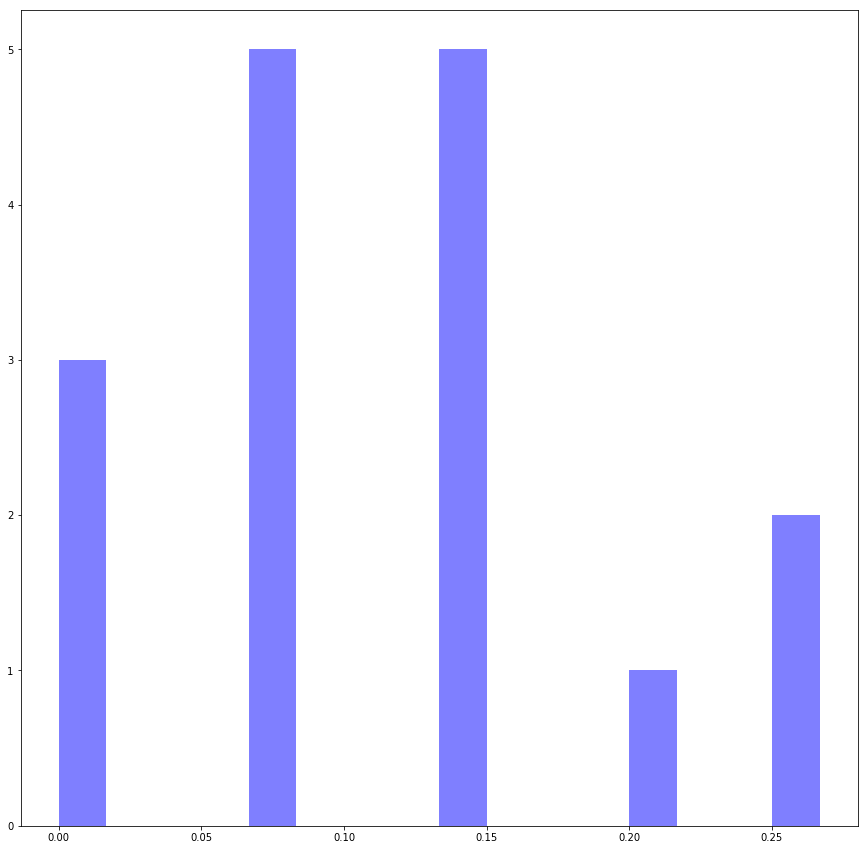

In [4]:
dist_funcs = [ attr_util.pareto_dist ]
attr_counts = [1024]
context_counts = [8]
prob_func = attr_util.exp_surprise
num_clusters = 2

for df in dist_funcs:
    for ac in attr_counts:
        for cc in context_counts:
            if cc > ac:
                continue

            attr_dists = df(ac)
            #attr_dists = [ attr_util.gen_peak_dist(ac, 0)(ac),
            #             attr_util.gen_peak_dist(ac, 1)(ac) ]
            params = {
                'attr_value_count' : ac,
                'attr_count' : cc,
                'attr_prob' : attr_dists,
                'context_switch_prob' : 0.25,
                'prob_func' : prob_func,
                'direct_cost' : 20,
                'indirect_cost' : 10,
                'attr_split_method' : 'deterministic'
            }
            
            G_attr = attribute_block_graph(_N, params)
            print('edges:', sum([v.degree for v in G_attr.vertices])/2)
            
            draw_graph(G_attr, params)
            plot_centralities(G_attr, params)